# 📊 Experiment Analysis: ML vs Baseline Healing
This notebook compares healing effectiveness using post-healing dataset.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, ttest_ind, f_oneway

# Load data
df = pd.read_csv("all_logs.csv")
df = df[df["mode"].isin(["ml", "baseline"])]  # Exclude NaNs


## 1. Sample Size Check

In [2]:
df['mode'].value_counts()

mode
ml          360
baseline    187
Name: count, dtype: int64

## 2. Failure Rate Comparison (Chi-square test)

In [3]:
# Build contingency table
contingency = pd.crosstab(df['mode'], df['status'])
chi2, p, _, _ = chi2_contingency(contingency)
print("Chi-square p-value:", round(p, 4))
contingency

Chi-square p-value: 0.2499


status,fail,pass
mode,,
baseline,36,151
ml,54,306


## 3. MTTR Comparison (T-test or ANOVA)

In [4]:
df['duration_s'] = pd.to_numeric(df['duration_s'], errors='coerce')
baseline_durations = df[df['mode'] == 'baseline']['duration_s'].dropna()
ml_durations = df[df['mode'] == 'ml']['duration_s'].dropna()
t_stat, p_val = ttest_ind(baseline_durations, ml_durations, equal_var=False)
print(f"T-test p-value: {round(p_val, 4)}")

T-test p-value: 0.0001


## 4. CPU and Memory Usage Comparison (ANOVA)

In [5]:
for metric in ['cpu_pct_avg', 'mem_kb_max']:
    print(f"\n== {metric.upper()} ==")
    base_vals = pd.to_numeric(df[df['mode'] == 'baseline'][metric], errors='coerce')
    ml_vals = pd.to_numeric(df[df['mode'] == 'ml'][metric], errors='coerce')
    f_stat, p_val = f_oneway(base_vals.dropna(), ml_vals.dropna())
    print(f"ANOVA p-value: {round(p_val, 4)}")


== CPU_PCT_AVG ==
ANOVA p-value: 0.0

== MEM_KB_MAX ==
ANOVA p-value: 0.0262


## 5. Visualization: Boxplots for Duration, CPU, Memory

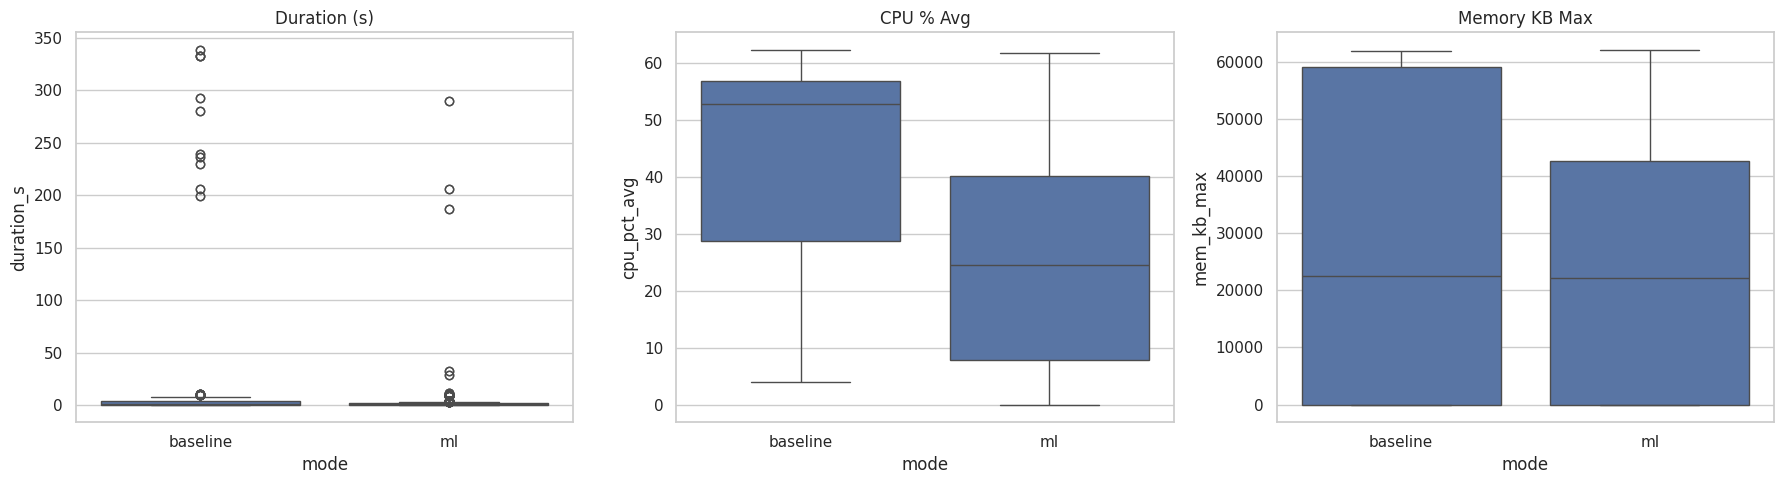

In [6]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(x="mode", y="duration_s", data=df, ax=axes[0]).set_title("Duration (s)")
sns.boxplot(x="mode", y="cpu_pct_avg", data=df, ax=axes[1]).set_title("CPU % Avg")
sns.boxplot(x="mode", y="mem_kb_max", data=df, ax=axes[2]).set_title("Memory KB Max")

plt.tight_layout()
plt.show()